# Punto 1

## Metodo 1

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#se importa el archivo cvc
df=pd.read_csv("/content/drive/MyDrive/IA/data_classification.csv", sep=';',header=0)
todo=np.array(df.values)
features=todo[:,0:2]
features=np.concatenate((np.zeros((100,1)),features),axis=1)
print(features.shape)

labels=todo[:,2:3]
weight=np.array([[1],[0.5],[0.5]])
print(weight.shape)

(100, 3)
(3, 1)


In [24]:
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

In [25]:
def predict(features, weights):
  '''
  Returns 1D array of probabilities
  that the class label == 1
  '''
  z = np.dot(features, weights)
  return sigmoid(z)

In [26]:
def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

In [27]:
def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

In [32]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print ("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history


iter: 0 cost: 0.6310338155270492
iter: 1000 cost: 0.6198301830421366


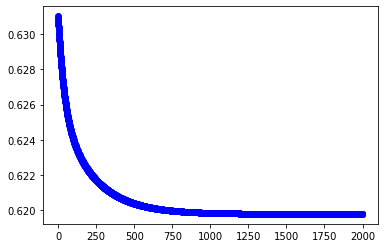

ff


In [62]:
weight=np.array([[0.01],[0.05],[0.05]])
weights,cost_history=train(features,labels,weight,0.001,2000)

plt.plot(cost_history, 'bo')

plt.show()
print("ff")


In [151]:
def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  def decision_boundary(prob):
    return 1 if prob >= .705 else 0

  decision_boundary = np.vectorize(decision_boundary)
  return decision_boundary(predictions).flatten()

def accuracy(predicted_labels, actual_labels):
    diff =np.subtract(predicted_labels,actual_labels)
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

predicciones=classify(predict(features,weights))
#print(predict(features,weights))
coso=np.array(predicciones)
coso=np.reshape(coso,(100,1))
print(accuracy(coso,labels))
print(accuracy(labels,labels))


0.79
1.0


## Con sklearn

In [164]:
#!pip install sklearn



import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Normalize grades to values between 0 and 1 for more efficient computation
normalized_range = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1))

# Extract Features + Labels
labels.shape =  (100,) #scikit expects this
features2 = normalized_range.fit_transform(features)

# Create Test/Train
features_train,features_test,labels_train,labels_test = train_test_split(features2,labels,test_size=0.4)

# Scikit Logistic Regression
scikit_log_reg = LogisticRegression()
scikit_log_reg.fit(features_train,labels_train)
clf=scikit_log_reg
#Score is Mean Accuracy
scikit_score = clf.score(features_test,labels_test)
print('Scikit score: ', scikit_score)
probabilities = predict(features, weights).flatten()
classifications = classify(probabilities)
our_acc = accuracy(classifications,labels.flatten())
print ('Our score: ',our_acc)



Scikit score:  0.9
Our score:  0.79
